Importing libraries 

In [4]:
import pandas as pd    # to load dataset
import numpy as np     # for mathematic equation
from nltk.corpus import stopwords   # to get collection of stopwords
from sklearn.model_selection import train_test_split       # for splitting dataset
from tensorflow.keras.preprocessing.text import Tokenizer  # to encode text to int
from tensorflow.keras.preprocessing.sequence import pad_sequences   # to do padding or truncating
from tensorflow.keras.models import Sequential     # the model
from tensorflow.keras.layers import Embedding, LSTM, Dense # layers of the architecture
from tensorflow.keras.callbacks import ModelCheckpoint   # save model
from tensorflow.keras.models import load_model   # load saved model
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import keras
import keras_metrics
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, SpatialDropout1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence,text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adamax
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\srsc4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\srsc4\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Linking Gdrive for accessing files/dataset

Reading dataset into dataframe

In [5]:
data = pd.read_csv('IMDB Dataset.csv')
data.head() # printing the first 5 instances

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


X is the review and y is the label

In [6]:
X = data['review'] 
y = data['sentiment']

Removing html and symbols from reviews

In [7]:
X = X.replace({'<.*?>': ''}, regex = True) # removing html symbols
X = X.replace({'[^A-Za-z]': ' '}, regex = True) # removing non-alphabet

In [9]:
X[1]

'A wonderful little production  The filming technique is very unassuming  very old time BBC fashion and gives a comforting  and sometimes discomforting  sense of realism to the entire piece  The actors are extremely well chosen  Michael Sheen not only  has got all the polari  but he has all the voices down pat too  You can truly see the seamless editing guided by the references to Williams  diary entries  not only is it well worth the watching but it is a terrificly written and performed piece  A masterful production about one of the great master s of comedy and his life  The realism really comes home with the little things  the fantasy of the guard which  rather than use the traditional  dream  techniques remains solid then disappears  It plays on our knowledge and our senses  particularly with the scenes concerning Orton and Halliwell and the sets  particularly of their flat with Halliwell s murals decorating every surface  are terribly well done '

Removing stop words

In [10]:
stop_words = set(stopwords.words('english'))
for i in range(len(X)):
  #X[i]=word_tokenize(X[i])
  X[i] = [w for w in X[i] if not w.lower() in stop_words]

Encoding sentiment, positive for 1 and negative for 0

In [11]:
y = y.replace('positive', 1)
y = y.replace('negative', 0)

Converting y into categorical values for keras input

In [12]:
y = to_categorical(y.values)

In [13]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Split into 80:20 ratio 

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

Calculating the unique no. of words

In [15]:
unique_word = len(np.unique(x_train))
print(unique_word)

39752


Calculating maximum length of the given reviews

In [16]:
length = []
for i in x_train:
  length.append(len(i))
max_length = int(np.ceil(np.mean(length)))
print(max_length)

798


Tokenizing and padding for model input

In [17]:
token = Tokenizer(lower=False)   
token.fit_on_texts(x_train)
x_train = token.texts_to_sequences(x_train)
x_test = token.texts_to_sequences(x_test)


x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

total_words = len(token.word_index) + 1   # add 1 because of 0 padding

In [18]:
print(x_train)
print(y_train)

[[ 1  5 14 ...  4  3  1]
 [ 3  1  5 ...  0  0  0]
 [ 9  1  5 ...  4  1  3]
 ...
 [ 1 26  4 ... 12  6  1]
 [ 3  1 22 ...  0  0  0]
 [18  8 13 ...  1  1  2]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


CNN model

In [19]:
num_class=2 # no. of possible outcomes
model = Sequential()
model.add(Embedding(unique_word, 150, input_length = max_length))
model.add(Conv1D(32,kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(num_class, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 798, 150)          5962800   
_________________________________________________________________
conv1d (Conv1D)              (None, 798, 32)           14432     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 399, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 399, 64)           6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 199, 64)           12352     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 99, 64)            0

In [20]:
print(x_train.shape, y_train.shape)

(40000, 798) (40000, 2)


In [21]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=100, batch_size=128)

Epoch 1/100
313/313 [==============================] - 49s 156ms/step - loss: 0.6918 - accuracy: 0.5177 - val_loss: 0.6843 - val_accuracy: 0.7561
Epoch 2/100
313/313 [==============================] - 47s 151ms/step - loss: 0.6618 - accuracy: 0.6037 - val_loss: 0.6561 - val_accuracy: 0.6080
Epoch 3/100
313/313 [==============================] - 48s 153ms/step - loss: 0.6255 - accuracy: 0.6553 - val_loss: 0.6100 - val_accuracy: 0.6712
Epoch 4/100
313/313 [==============================] - 48s 155ms/step - loss: 0.5893 - accuracy: 0.6888 - val_loss: 0.5771 - val_accuracy: 0.7075
Epoch 5/100
313/313 [==============================] - 49s 157ms/step - loss: 0.5646 - accuracy: 0.7110 - val_loss: 0.5643 - val_accuracy: 0.7173
Epoch 6/100
313/313 [==============================] - 48s 154ms/step - loss: 0.5469 - accuracy: 0.7253 - val_loss: 0.5465 - val_accuracy: 0.7269
Epoch 7/100
313/313 [==============================] - 48s 154ms/step - loss: 0.5361 - accuracy: 0.7325 - val_loss: 0.5334 -

Epoch 57/100
313/313 [==============================] - 47s 151ms/step - loss: 0.3220 - accuracy: 0.8602 - val_loss: 0.4575 - val_accuracy: 0.8019
Epoch 58/100
313/313 [==============================] - 47s 151ms/step - loss: 0.3177 - accuracy: 0.8630 - val_loss: 0.5072 - val_accuracy: 0.7741
Epoch 59/100
313/313 [==============================] - 48s 152ms/step - loss: 0.3069 - accuracy: 0.8684 - val_loss: 0.4420 - val_accuracy: 0.8075
Epoch 60/100
313/313 [==============================] - 47s 151ms/step - loss: 0.3009 - accuracy: 0.8715 - val_loss: 0.5018 - val_accuracy: 0.7858
Epoch 61/100
313/313 [==============================] - 47s 150ms/step - loss: 0.3134 - accuracy: 0.8647 - val_loss: 0.4241 - val_accuracy: 0.8091
Epoch 62/100
313/313 [==============================] - 47s 151ms/step - loss: 0.3028 - accuracy: 0.8730 - val_loss: 0.4701 - val_accuracy: 0.8006
Epoch 63/100
313/313 [==============================] - 47s 151ms/step - loss: 0.2977 - accuracy: 0.8749 - val_loss: 0

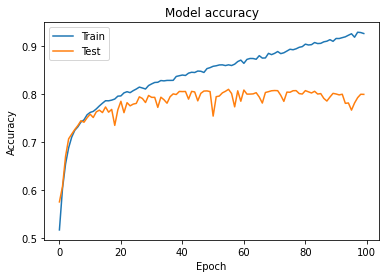

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.save('model')
CNN_model = load_model('model')
CNN_model.summary()

INFO:tensorflow:Assets written to: model\assets
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 798, 150)          5962800   
_________________________________________________________________
conv1d (Conv1D)              (None, 798, 32)           14432     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 399, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 399, 64)           6208      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 199, 64)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 199, 64)           12352     
_________________________________________________________________
max_pool

LSTM model

In [24]:
model1=Sequential()
model1.add(Embedding(max_length,100,mask_zero=True))
model1.add(LSTM(64,dropout=0.4, recurrent_dropout=0.4,return_sequences=True))
model1.add(LSTM(32,dropout=0.5, recurrent_dropout=0.5,return_sequences=False))
model1.add(Dense(2,activation='softmax'))
model1.compile(loss='categorical_crossentropy',optimizer='adamax',metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         79800     
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 134,522
Trainable params: 134,522
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model1.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=20, batch_size=128)

Epoch 1/20
313/313 [==============================] - 987s 3s/step - loss: 0.6903 - accuracy: 0.7287 - val_loss: 0.6840 - val_accuracy: 0.7534
Epoch 2/20
313/313 [==============================] - 934s 3s/step - loss: 0.6870 - accuracy: 0.7424 - val_loss: 0.6925 - val_accuracy: 0.7111
Epoch 3/20
313/313 [==============================] - 920s 3s/step - loss: 0.6917 - accuracy: 0.7221 - val_loss: 0.6806 - val_accuracy: 0.7796
Epoch 4/20
313/313 [==============================] - 946s 3s/step - loss: 0.6760 - accuracy: 0.7821 - val_loss: 0.6691 - val_accuracy: 0.7939
Epoch 5/20
313/313 [==============================] - 930s 3s/step - loss: 0.6834 - accuracy: 0.7599 - val_loss: 0.6770 - val_accuracy: 0.7753
Epoch 6/20
313/313 [==============================] - 934s 3s/step - loss: 0.6753 - accuracy: 0.8853 - val_loss: 0.6736 - val_accuracy: 0.7916
Epoch 7/20
313/313 [==============================] - 927s 3s/step - loss: 0.6730 - accuracy: 0.8902 - val_loss: 0.6686 - val_accuracy: 0.7972

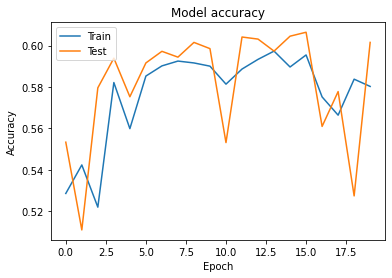

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [27]:
model1.save('model1')
LSTM_model = load_model('model1')
LSTM_model.summary()

INFO:tensorflow:Assets written to: model1\assets
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 100)         79800     
_________________________________________________________________
lstm (LSTM)                  (None, None, 64)          42240     
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 134,522
Trainable params: 134,522
Non-trainable params: 0
_________________________________________________________________
